# Astronomer Edwin Hubble, in 1929, published a very important paper where he discovered that there is an approximately linear relationship between the distance and velocity of extragalactic nebulae. This was the foundation that would come to be the big bang theory.

## A reprint of the article is available at http://apod.nasa.gov/diamond_jubilee/d_1996/hub_1929.html , where the data was obtained from.

### The dataset is very small and simply printed in the article itself! Some minor formatting and cleanup was done to the data to make it easier to use. In particular, the velocity values were manually changed to be all positive as only the magnitude of the velocity matters.

### Importing libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### Loading data

In [3]:
hubble_data = pd.read_csv('data/hubble.csv', skiprows=2, names=['id', 'r', 'v'])
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


In [4]:
hubble_data.shape

(24, 3)

In [5]:
hubble_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      24 non-null     object 
 1   r       24 non-null     float64
 2   v       24 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
hubble_data.describe()

,r,v
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


### Using Scatter Plot to determine whether the two variables have a relationship or correlation

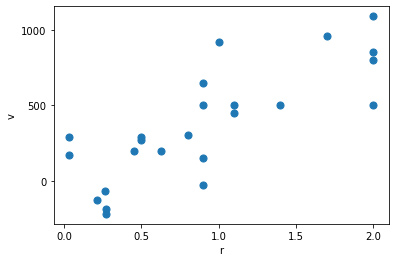

In [7]:
hubble_data.plot(kind='scatter', x='r',y='v', s=50)
plt.locator_params(nbins=5)

### Observing the plot, it is clearly seen that there is a relationship between distance and velocity, contradicting the view, prevalent at the time, that the Universe is stationary. To make the relationship clearer, we can add a trend line to the plot.

### computing the linear regression line for the relationship:

In [17]:
from scipy.stats import linregress
rv = hubble_data[['r','v']]


In [18]:
rv = rv.to_numpy()

In [19]:
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

454.15844092262836 -40.78364909586037 0.7896394879353182 4.477491000609172e-06 75.23710534716909


### rounding to two decimals, a=454.16, b=-40.78, r=0.79, p=4.48E-6, and stderr=75.24

### The correlation coefficient of 0.79 indicates a strong relationship, and the very small p-value indicates that the null hypothesis should be rejected, giving support to the existence of a relationship between the variables. The square of r is 0.62, so 62% of the variability in the data is explained by the linear model as opposed to random variation.

### All this indicates that a linear model can describe the increase in velocity as a function of distance for galaxies in the Universe. To display this visually, we can plot the regression line together with the data

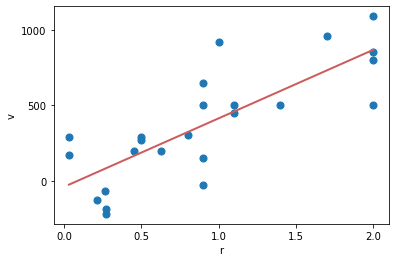

In [20]:
hubble_data.plot(kind='scatter', x='r', y='v', s=50)
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='IndianRed', lw=2)
plt.locator_params(nbins=5)

# Conclusion: From this model, Hubble went on to hypothesize that the Universe is expanding, an idea that eventually yielded the model for the Universe currently accepted in cosmology.